# Mobile Games: A/B Testing & Player Retention

## 1. Project background

We have an app for mobile phones. It's a videogame. 

As players progress through the levels of the game, they will occasionally encounter blocking pop-ups that force them to wait an amount of time or make an in-app purchase to progress, so that they do not have to wait. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged (because the game will not be that easy to finish).

But, where should the gates be placed? Initially the first gate was placed at level 25. In this project, we're going to analyze an AB-test where we moved the first gate in the game from level 25 to level 50. In particular, we will look at the impact on player retention.

![image info](./game_im.png)

## 2. About the data

Read the file game.csv

In [1]:
# Entendemos el caso de uso y qué es un A|B testing

In [18]:
#import moldules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as  sns

%matplotlib inline

In [19]:
game = pd.read_csv('game.csv', index_col=0)

In [20]:
game.head()

,userid,version,retention_1,retention_7,sum_gamerounds
0,116,gate_25,False,False,7
1,337,gate_25,True,False,39
2,377,gate_50,True,False,168
3,483,gate_50,False,False,6
4,488,gate_50,True,True,200


How many users are in the experiment while the AB-test was running?



The variables are:

userid - a unique number that identifies each player.

version - whether the player was put in the control group (gate_25 - a gate at level 25) or the test group (gate_50 - a gate at level 50).

sum_gamerounds - the number of game rounds played by the player during the __first week after installation__

retention_1 - did the player come back and play 1 day after installing?

retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_25 or gate_50


In [21]:
# comprobamos cuántas versiones distintas hay
game['version'].unique()

array(['gate_25', 'gate_50'], dtype=object)

In [22]:
# exploramos un poco el dataset

In [23]:
game.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,59.913493
std,2.883286e+06,195.177850
min,1.160000e+02,0.000000
25%,2.512230e+06,13.000000
50%,4.995815e+06,26.000000
75%,7.496452e+06,60.000000
max,9.999861e+06,49871.000000


In [24]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   retention_1     90189 non-null  bool  
 3   retention_7     90189 non-null  bool  
 4   sum_gamerounds  90189 non-null  int64 
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB


In [25]:
game.columns

Index(['userid', 'version', 'retention_1', 'retention_7', 'sum_gamerounds'], dtype='object')

## 3. Count the number of players in each group

Are the control group and the test group balanced?

In [28]:
# comprobamos cómo están de balanceados los grupos

In [26]:
game.groupby('version').count()['userid']

version
gate_25    44700
gate_50    45489
Name: userid, dtype: int64

## 4. Analyzing player behaviour

We will plot a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

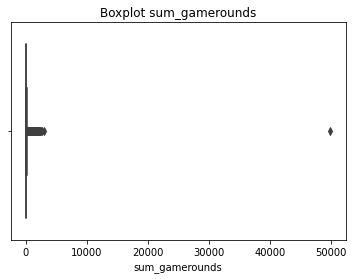

In [27]:
# pintamos los game rounds
sns.boxplot(game['sum_gamerounds'])
plt.title('Boxplot sum_gamerounds')
plt.savefig('Boxplot sum_gamerounds')

In [28]:
#function drop outlayers_maximum and outlayers_minimum of DataFrame
#return df

def drop_outlayers_df(df,column):
    #get 1est quartile and 3er quartile 
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    #inter quartile range
    iqr = q3 - q1
    
    #get maximun
    maximum = q3 + (1.5*iqr)
    
    #get minimum
    minimum = q1 - (1.5*iqr)
    
    #get indexes row outlayers, max and min
    idx_maximum = df[df[column] > maximum].index
    idx_minimum = df[df[column] < minimum].index
    
    #drop rox outlayers
    df.drop(idx_maximum, axis = 0, inplace = True)
    df.drop(idx_minimum, axis = 0, inplace = True)
    
    return df

In [29]:
df = game.copy()
# entendemos la gráfica
drop_outlayers_df(game,'sum_gamerounds')

,userid,version,retention_1,retention_7,sum_gamerounds
0,116,gate_25,False,False,7
1,337,gate_25,True,False,39
3,483,gate_50,False,False,6
6,1066,gate_25,False,False,8
7,1444,gate_50,False,False,8
...,...,...,...,...,...
90184,9999441,gate_50,True,False,99
90185,9999479,gate_50,False,False,33
90186,9999710,gate_25,True,False,36
90187,9999768,gate_50,True,False,51


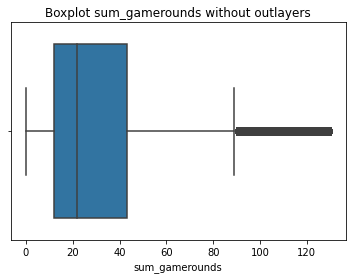

In [30]:
sns.boxplot(game['sum_gamerounds'])
plt.title('Boxplot sum_gamerounds without outlayers')
plt.savefig('Boxplot sum_gamerounds without outlayers')

### To learn about the behavior of the majority of the players, we will check the percentiles.

In [31]:
# estudiamos los percentiles de los game rounds
q1 = game['sum_gamerounds'].quantile(q=0.25)
q3 = game['sum_gamerounds'].quantile(q=0.75)
print('Percentil 25%: ', q1)
print('Percentil 75%: ', q3)

Percentil 25%:  12.0
Percentil 75%:  43.0


In [129]:
# entendemos los percentiles


### Counting the number of players for each number of gamerounds 


In [32]:
# los contamo
game.groupby('sum_gamerounds').count()['userid']

sum_gamerounds
0       130
1       523
2       917
3      1230
4      1569
       ... 
126     103
127      95
128      88
129      87
130     113
Name: userid, Length: 131, dtype: int64

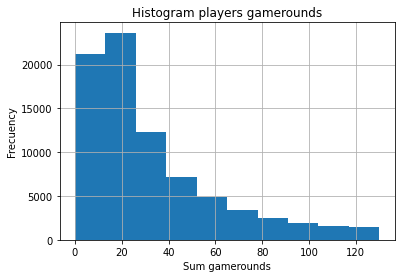

In [40]:
# los contamo
game['sum_gamerounds'].hist()
plt.title('Histogram players gamerounds')
plt.ylabel('Frecuency')
plt.xlabel('Sum gamerounds')
plt.savefig("Histogram Gamerounds")

In [131]:
# estudiamos algún valor interesante de los percentiles aplicados al cálculo anterior


In [132]:
# entendemos los datos

As we can see, 50% of players played fewer than 26 game rounds during the first week after installation, and 75% of players played fewer than 60 rounds.

There were users who did not play much after installation. Possible reasons may include:

They downloaded a number of new games at the same time and were attracted by other games.
They opened the app but did not like the design/interface/music, so they quit even before playing the game.
They have not started playing the game yet.


For these players, the reasons for leaving may include:

They did not enjoy the game. (This is probably the most common reason).
The game turned out to be different from what they expected.
The game was too easy and they got bored of it.


It is important to understand why a large number of players quit the game at an early stage.

### Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.

In [133]:
# la dibujamos
ax = plt.

The distribution is highly skewed, with a long tail on the right.

A huge number of players played fewer than 10 rounds and left the game. For rounds greater than 65, the number of players stayed steady at about 300.

In [34]:
game[game['sum_gamerounds'] == 65].count()

userid            333
version           333
retention_1       333
retention_7       333
sum_gamerounds    333
dtype: int64

In [51]:
# estudiamos cuánta gente juega 65 veces en la primera semana de instalación
game[game['sum_gamerounds'] >= 65].count()

userid            10915
version           10915
retention_1       10915
retention_7       10915
sum_gamerounds    10915
dtype: int64

In [50]:
game[game['sum_gamerounds']>= 42].count()

userid            21051
version           21051
retention_1       21051
retention_7       21051
sum_gamerounds    21051
dtype: int64

10136

## 4.1 Comparing 1-day Retention

In the plot above we can see that some players install the game but then never play it, some players just play a couple of game rounds in their first week, and some get really hooked! What we want is for players to like the game and to get hooked.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention: the percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

#### Overall 1-day retention

In [35]:
game.groupby('version')['retention_1'].mean()

version
gate_25    0.389884
gate_50    0.383824
Name: retention_1, dtype: float64

In [36]:
game.groupby('version')['retention_7'].mean()

version
gate_25    0.119121
gate_50    0.110463
Name: retention_7, dtype: float64

In [57]:
# calcula la media sin usar una función que sea la media, para conocer la media de retention_1
game[game['retention_1'] == True].count()[0]/game.shape[0]

0.3868262426836726

In [58]:
game[game['retention_7'] == True].count()[0]/game[game['retention_1'] == True].count()[0]

0.2966511807975223

In [136]:
# calcula la media usando una función que sea la media, para conocer la media de retention_1


A little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.

#### 1-day retention for each AB-group

In [137]:
# estudia la media de la retention_1 según el tipo de versión


It appears that there was a slight decrease in 1-day retention when the gate was moved to level 50 (44.2%) compared to the control when it was at level 25 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 50 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

#### Bootstrapping: Should we be confident in the difference?


La idea básica de bootstrap es que la inferencia sobre una población a partir de datos de muestra, (muestra → población), puede ser modelada mediante un nuevo muestreo de los datos de la muestra y realizando la inferencia sobre una muestra a partir de datos remuestreados. Como la población es desconocida, el verdadero error en una muestra estadística contra su valor poblacional es desconocido. En las re-muestras de bootstrap, la 'población' es de hecho la muestra, y esto se conoce; por lo tanto, se puede medir la calidad de la inferencia de la muestra "verdadera" a partir de datos remuestreados, (muestra re-muestreada).

In [138]:
# Creating a list with bootstrapped means for each AB-group
# haz un bootstrapping con mil subgrupos de tamaño la mitad del original y aleatorios para estudiar la media de retention_1


    
# Transforming the list to a DataFrame

    
# A Kernel Density Estimate plot of the bootstrap distributions


These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. There seems to be some evidence of a difference, although small. 

### Let's plot the % difference to have a closer look.

In [139]:
# Adding a column with the % difference between the two AB-groups


# Ploting the bootstrap % difference


# Calculating the probability that 1-day retention is greater when the gate is at level 25


From this chart, we can see that the most likely % difference is around 1% - 2%, and that 90% of the distribution is above 0%, in favor of a gate at level 25.

### 4.2 Comparing 7-day Retention

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 25. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 25 yet. That is, many players won't have been affected by the gate, even if it's as early as level 25.

But after having played for a week, more players should have reached level 50, and therefore it makes sense to also look at 7-day retention.

In [140]:
# calcula la retención media a 7 días según el grupo de control


Insights:

Like with 1-day retention, 7-day retention is slightly lower when the gate is at level 50 (18.2%) than when the gate is at level 25 (19.0%).
This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate.
The overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.
But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

#### Creating a list with bootstrapped means for each AB-group

In [141]:
# boostrapping de 500 subgrupos para la media de retention_7, los subgrupos son la mitad de las muestras del tamaño original

    
# Transforming the list to a DataFrame


# Adding a column with the % difference between the two AB-groups


# Ploting the bootstrap % difference


# Calculating the probability that 7-day retention is greater when the gate is at level 25



## 5. Conclusion 


In [ ]:
# vuestras conclusiones de los datos